In [1]:
#..MODIFIED BY CHUYAN at Feb.15th, this file was intended to re-plot some former figures in a better way
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import pandas as pd
import glob
from scipy.stats import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from scipy.optimize import curve_fit
import seaborn as sns
from Aploting_Sep11 import *
from area_mean import *
from useful_func_cy import *

In [2]:
# Model list (Global Climate Model);

exp = 'piControl'

# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}


In [13]:
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, CNRMCM61HR, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]   # current # 30 (no.19) + 20 = 50
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'CNRMCM61HR', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']
# current gcm # 30 + 20

# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_Sep8_Observation_data/'

In [4]:
## PLot 1' # read data for best fit, 4-lrm:

output_ARRAY_best4 = {}   # storage output file
output_intermedia_best4 = {}   # storage the 'rawdata_dict'

output_dict0_PI_best4 = {}
output_dict0_abr_best4 = {}

output_GMT =  {}
output_4lrm_predicted = {}  # dict, store annualy, area_meaned prediction of variables: LWP,IWP, rsut,rsut_lL, albedo,albedo_lL
output_4lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs output: LWP, IWP, rsut, albedo
output_4lrm_coef_LWP = {}
output_4lrm_coef_albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_4lrm_coef_albedo_lL = {}


# Report data: dictionaries
output_4lrm_yr_bin_abr = {}
output_4lrm_yr_bin_PI  = {}
output_4lrm_mon_bin_abr = {}
output_4lrm_mon_bin_PI = {}  # above are 3d-strcture array
# output_4lrm_flavra_abr =  {}
# output_4lrm_flavra_PI  =  {}   # were monthly data in 1-d

shape_mon_pi = {}
shape_mon_abr = {}
output_4lrm_metric_actual_PI = {}
output_4lrm_metric_actual_abr = {}

# Predicted data:
output_4lrm_mon_bin_predi_PI =  {}
output_4lrm_mon_bin_predi_abr = {}


# Index for regime(s): Only for 4lrm
output_ind_Cold_Up_PI = {}
output_ind_Hot_Up_PI = {}
output_ind_Cold_Down_PI = {}
output_ind_Hot_Down_PI = {}

output_ind_Cold_Up_abr = {}
output_ind_Hot_Up_abr = {}
output_ind_Cold_Down_abr = {}
output_ind_Hot_Down_abr = {}

TR_sst =  271.79
TR_sub =  1.0

for j in range(len(deck2)):
    # Best fit_files:
    
    folder_4lrm = glob.glob(path1 +deck2[j]['modn'] +'_r4r1(Jan)_(largestpiR2)_Sep9th_Normalized_' + '*K'+'_ud'+ '*' +'_dats.npz')
    print(folder_4lrm)
    output_ARRAY_best4[deck_nas2[j]] = load(str(folder_4lrm[0]), allow_pickle=True)  # str(TR_sst)+str(TR_sub)
    
    # folder_4lrm =  glob.glob(path1 +deck2[j]['modn'] +'_swrpredi(largestpiR2)_' + '*K'+'_ud'+ '*' +'_dats.npz')
    # print(folder_4lrm)
    # output_ARRAY_best4[deck_nas2[j]] =  load(str(folder_4lrm), allow_pickle=True)  # str(TR_sst)+str(TR_sub)
    # defined Thresholds files:
    # output_ARRAY_best4[deck_nas2[j]] =  load(path1+deck2[j]['modn']+'_swrpredi_'+ str(TR_sst)+'K'+'_ud'+ str(TR_sub)+ '_dats.npz', allow_pickle=True)  
    
    output_intermedia_best4[deck_nas2[j]] = output_ARRAY_best4[deck_nas2[j]]['rawdata_dict']
    
    output_dict0_PI_best4[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['dict1_PI_var']
    output_dict0_abr_best4[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['dict1_abr_var']
    
    output_GMT[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['GMT']
    output_4lrm_predicted[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['predicted_metrics']
    output_4lrm_report[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['report_metrics']
    output_4lrm_coef_LWP[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['Coef_dict']
    output_4lrm_coef_albedo[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['coef_array_albedo_pi']

    # Monthly data dict
    output_4lrm_mon_bin_PI[deck_nas2[j]] = output_dict0_PI_best4[deck_nas2[j]]['dict1_mon_bin_PI']
    output_4lrm_mon_bin_abr[deck_nas2[j]] = output_dict0_abr_best4[deck_nas2[j]]['dict1_mon_bin_abr']
    # Annually data dict
    output_4lrm_yr_bin_PI[deck_nas2[j]] = output_dict0_PI_best4[deck_nas2[j]]['dict1_yr_bin_PI']
    output_4lrm_yr_bin_abr[deck_nas2[j]] = output_dict0_abr_best4[deck_nas2[j]]['dict1_yr_bin_abr']
    
    # Metric monthly mean bin data
    shape_mon_pi[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['shape_mon_PI_3']
    shape_mon_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['shape_mon_abr_3']
    output_4lrm_metric_actual_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['metric_training']
    output_4lrm_metric_actual_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['metric_predict']
    
    
    # Flattened Predicted monthly bin data
    output_4lrm_mon_bin_predi_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_PI']
    output_4lrm_mon_bin_predi_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_abr']
    
    
    
    # Statistic metrics measures the predictions
    # output_4lrm_stats_PI_rsut_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_PI_rsut_lL']
    # output_4lrm_stats_abr_rsut_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_abr_rsut_lL']
    # output_4lrm_stats_PI_albedo_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_PI_albedo_lL']
    # output_4lrm_stats_abr_albedo_lL[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['stats_dict_abr_albedo_lL']

    # INDEX of regime(s): determine regime-dependent model mean_state LWP
    output_ind_Cold_Up_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Up_PI']
    output_ind_Hot_Up_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Up_PI']
    output_ind_Cold_Down_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Down_PI']
    output_ind_Hot_Down_PI[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Down_PI']
    output_ind_Cold_Up_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Up_abr']
    output_ind_Hot_Up_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Up_abr']
    output_ind_Cold_Down_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Cold_Down_abr']
    output_ind_Hot_Down_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['ind_Hot_Down_abr']

print('Done read 4-LRM file(s)')


['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1_r4r1(Jan)_(largestpiR2)_Sep9th_Normalized_-0.17K_ud7.74_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r4r1(Jan)_(largestpiR2)_Sep9th_Normalized_-0.6K_ud-35.42_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2_r4r1(Jan)_(largestpiR2)_Sep9th_Normalized_0.01K_ud67.44_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2_r4r1(Jan)_(largestpiR2)_Sep9th_Normalized_-0.02K_ud80.06_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM_r4r1(Jan)_(largestpiR2)_Sep9th_Normalized_0.02K_ud67.99_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1_r4r1(Jan)_(largestpiR2)_Sep9th_Normalized_-0.07K_ud34.32_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-CM6-1-HR_r4r1(Jan)_(largestpiR2)_Sep9th_Normalized_-0.55K_ud66.99_dats.npz']
['/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-G_r4r1(Jan)_(largestpiR2)_Sep9

In [24]:
## Read two Regimes (Hot,Cold) data

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT = {}
output_2lrm_predict = {}  # dict, store annualy, area_meaned prediction of LWP
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs LWP
output_2lrm_coef_LWP = {}
output_2lrm_dict_Albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_coef_albedo_lL = {}

# Raw data
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}

# Metric raw data in specific units:
shape_mon_pi = {}
shape_mon_abr = {}
output_2lrm_metric_actual_PI = {}
output_2lrm_metric_actual_abr = {}

# Statistic metrics of PI:
output_Mean_training = {}
output_Stdev_training = {}

# Predict metric data in specific units:
output_2lrm_mon_bin_LWPpredi_PI = {}
output_2lrm_mon_bin_LWPpredi_abr = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}

Tr_sst =  0.0

for i in range(len(deck2)):
    # print("i", i)
    folder_2lrm = glob.glob(path1+deck2[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest' + '*' + '_dats.npz')
    print(len(folder_2lrm))
    
    if len(folder_2lrm) == 4:
        if (len(folder_2lrm[0]) < len(folder_2lrm[1])) & (len(folder_2lrm[0]) < len(folder_2lrm[2])) & (len(folder_2lrm[0]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[0]
        elif (len(folder_2lrm[1]) < len(folder_2lrm[0])) & (len(folder_2lrm[1]) < len(folder_2lrm[2])) & (len(folder_2lrm[1]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[2]) < len(folder_2lrm[0])) & (len(folder_2lrm[2]) < len(folder_2lrm[1])) & (len(folder_2lrm[2]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[2]
        else:
            folder_best2lrm = folder_2lrm[3]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 3:
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 2:
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        
    else:
        output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
        print(folder_2lrm[0])
    
    output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle = True)  #+'_'+str(Tr_sst)

    # output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']

    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    print(output_2lrm_dict_Albedo, "i", i, output_intermedia[deck_nas2[i]][()].keys())
    output_2lrm_dict_Albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_dict_Albedo_pi']
    
    # Monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    
    # Flattened Metric monthly mean bin data
    shape_mon_pi[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_PI_3']
    shape_mon_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_abr_3']
    output_2lrm_metric_actual_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_training']
    output_2lrm_metric_actual_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_predict']
    
    # Flattened Predicted monthly bin data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']

    # Statistic metrics of PI:
    output_Mean_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Mean_training']
    output_Stdev_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Stdev_training']
    
    # Indice for Regimes
    output_ind_Hot_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_PI']
    output_ind_Cold_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_PI']

    output_ind_Hot_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_abr']
    output_ind_Cold_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_abr']

print('Down read 2-LRM.')


4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-3.63_dats.npz
{} i 0 dict_keys(['dict1_PI_var', 'dict1_abr_var', 'model_data', 'coef_dict_Alpha_cre_pi', 'coef_dict_Albedo_pi', 'coef_dict_Alpha_cre_abr', 'coef_dict_Albedo_abr', 'shape_yr_PI_3', 'shape_yr_abr_3', 'shape_yr_PI_gmt_3', 'shape_yr_abr_gmt_3', 'shape_mon_PI_3', 'shape_mon_abr_3', 'shape_mon_PI_gmt_3', 'shape_mon_abr_gmt_3', 'metric_training', 'metric_predict', 'GMT_training', 'GMT_predict', 'Mean_training', 'Stdev_training', 'Coef_dict', 'Predict_dict_PI', 'ind_Hot_PI', 'ind_Cold_PI', 'LWP_predi_bin_PI', 'Predict_dict_abr', 'ind_Hot_abr', 'ind_Cold_abr', 'LWP_predi_bin_abr', 'stats_dict_PI', 'stats_dict_abr', 'areamean_dict_predi', 'areamean_dict_abr', 'areamean_dict_PI', 'dX_dTg', 'Yrs', 'GMT', 'predicted_metrics', 'report_metrics', 'TR_sst'])
4
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-1

In [25]:
#### Standard deviation of Cloud Controlling factor (Xi) and Liquid Water Path (LWP):

sigmaXi_r1 = full((len(deck2), 4), 0.0)  # Cold
sigmaXi_r2 = full((len(deck2), 4), 0.0)  # Hot

sigmaLWP_r1 = full((len(deck2)), 0.0)  # Cold
sigmaLWP_r2 = full((len(deck2)), 0.0)  # Hot
sigmaLWP_ALL = full((len(deck2)), 0.0)  # Southern Ocean as a whole

# Changes of variable between 'piControl' (mean-state) and 'abrupt4xCO2' (warming period, take 121 - 140 yrs' mean of abr4x experiment)
# Cloud Controlling factor (Xi), Liquid Water Path (LWP), and global mean surface air Temperature (gmt):
delta_gmt = full(len(deck2), 0.000)

delta_SST = full((len(deck2), 2), 0.0)  # two Regimes, Cold & Hot
delta_p_e = full((len(deck2), 2), 0.0)
delta_LTS = full((len(deck2), 2), 0.0)
delta_SUB = full((len(deck2), 2), 0.0)
delta_LWP = full((len(deck2), 2), 0.0)
delta_LWP_ALL = full((len(deck2)), 0.0)  # Southern Ocean lwp changes

# Standardized changes of variables
# Cloud Controlling factor (Xi) scaled by 'gmt', Liquid Water Path (LWP):
dX_dTg_r1 = full((len(deck2), 4), 0.0)  # Cold
dX_dTg_r2 = full((len(deck2), 4), 0.0)  # Hot
delta_LWP_dTg = full((len(deck2)), 0.0)  # Southern Ocean lwp changes scaled by gmt
delta_LWP_dTgr1 = full((len(deck2)), 0.0)  # Cold
delta_LWP_dTgr2 = full((len(deck2)), 0.0)  # Hot

# Coef of LWP to Cloud controlling factors, Xis, for two regimes
# GCM values and the OBS values

stcoef_r1 = full((len(deck2), 4), 0.0)  # Cold
stcoef_r2 = full((len(deck2), 4), 0.0)  # Hot 
stcoef_obs = full((4), 0.0)  # Hot Regime Only

In [28]:
from copy import deepcopy

f5yr_index = 121*12
l5yr_index = 141*12


for i in range(len(deck_nas2)):
    
    # indice of Regimes;
    ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]]
    ind_Hot_PI = output_ind_Hot_PI[deck_nas2[i]]
    ind_Cold_abr = output_ind_Cold_abr[deck_nas2[i]]
    ind_Hot_abr = output_ind_Hot_abr[deck_nas2[i]]
    # print(ind_Cold_PI.shape)
    # print(ind_Hot_abr)

    # print(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI].shape)
    ## calc standard_deviation for CCFs at training period:

    sigmaXi_r1[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Cold_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Cold_PI])])
    
    sigmaXi_r2[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Hot_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Hot_PI])])
    
    sigmaLWP_r1[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Cold_PI])
    sigmaLWP_r2[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Hot_PI])
    sigmaLWP_ALL[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][logical_or(ind_Cold_PI, ind_Hot_PI)])
    
    # calc changes of variables in two different regimes:
    
    # indice for 'Hot' and 'Cold' regimes corresponding to the last period
    ind_last20_Cold_abr = deepcopy(output_ind_Cold_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_last20_Cold_abr[0:f5yr_index, :, :] = False
    ind_last20_Cold_abr[l5yr_index:, :, :] = False
    ind_last20_Hot_abr = deepcopy(output_ind_Hot_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_last20_Hot_abr[0:f5yr_index, :, :] = False
    ind_last20_Hot_abr[l5yr_index:, :, :] = False
    ind_last20_All_abr = np.logical_or(ind_last20_Cold_abr, ind_last20_Hot_abr)
    
    ind_last20_Cold_PI = deepcopy(output_ind_Cold_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_last20_Hot_PI = deepcopy(output_ind_Hot_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_last20_All_PI = np.logical_or(ind_last20_Cold_PI, ind_last20_Hot_PI)
    
    LWP_all_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_all_abr[np.logical_not(ind_last20_All_abr)] = np.nan
    
    LWP_all_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_all_PI[np.logical_not(ind_last20_All_PI)] = np.nan
    
    LWP_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    LWP_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    LWP_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    LWP_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_LWP_ALL[i] = np.nanmean(area_mean(LWP_all_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_all_PI, y_range, x_range))
    delta_LWP[i, 0] = np.nanmean(area_mean(LWP_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_cold_PI, y_range, x_range))
    delta_LWP[i, 1] = np.nanmean(area_mean(LWP_hot_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_hot_PI, y_range, x_range))
    # print('1:', area_mean(LWP_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range))
    # print('2:', area_mean(LWP_cold_PI[:,:,:], y_range, x_range))
    
    # SST.
    SST_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    SST_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    SST_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    SST_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan

    delta_SST[i, 0] = np.nanmean(area_mean(SST_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SST_cold_PI, y_range, x_range))
    delta_SST[i, 1] = np.nanmean(area_mean(SST_hot_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SST_hot_PI, y_range, x_range))
    
    # p - e.
    p_e_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e']).reshape(shape_mon_abr[deck_nas2[i]])
    p_e_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    p_e_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e']).reshape(shape_mon_abr[deck_nas2[i]])
    p_e_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    p_e_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e']).reshape(shape_mon_pi[deck_nas2[i]])
    p_e_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    p_e_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e']).reshape(shape_mon_pi[deck_nas2[i]])
    p_e_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan

    delta_p_e[i, 0] = np.nanmean(area_mean(p_e_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(p_e_cold_PI, y_range, x_range))
    delta_p_e[i, 1] = np.nanmean(area_mean(p_e_hot_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(p_e_hot_PI, y_range, x_range))

    # LTS.
    LTS_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    LTS_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    LTS_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    LTS_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_LTS[i, 0] = np.nanmean(area_mean(LTS_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LTS_cold_PI, y_range, x_range))
    delta_LTS[i, 1] = np.nanmean(area_mean(LTS_hot_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LTS_hot_PI, y_range, x_range))

    # SUB_500.
    SUB_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB']).reshape(shape_mon_abr[deck_nas2[i]])
    SUB_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    SUB_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB']).reshape(shape_mon_abr[deck_nas2[i]])
    SUB_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    SUB_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB']).reshape(shape_mon_pi[deck_nas2[i]])
    SUB_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    SUB_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB']).reshape(shape_mon_pi[deck_nas2[i]])
    SUB_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_SUB[i, 0] = np.nanmean(area_mean(SUB_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SUB_cold_PI, y_range, x_range))
    delta_SUB[i, 1] = np.nanmean(area_mean(SUB_hot_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SUB_hot_PI, y_range, x_range))
    
    # gmt.
    gmt_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['gmt'])
    delta_gmt[i] = np.nanmean(gmt_abr[f5yr_index:l5yr_index])

# print(delta_gmt)
# print(sigmaLWP_r2)
# print(sigmaLWP_ALL)
# print(delta_SUB)
# print(delta_LWP_ALL)

In [58]:
# changes of variables;
# standardized change of Xi scaled by gmt, lwp change scaled by 'gmt':

for i in range(len(deck_nas2)):
 
    dX_dTg_r1[i, :] = (np.asarray([delta_SST[i, 0], delta_p_e[i, 0], delta_LTS[i, 0], delta_SUB[i,0]] / delta_gmt[i]).flatten()) / sigmaXi_r1[i, :]  # Cold
    dX_dTg_r2[i, :] = (np.asarray([delta_SST[i, 1], delta_p_e[i, 1], delta_LTS[i, 1], delta_SUB[i,1]] / delta_gmt[i]).flatten()) / sigmaXi_r2[i, :]  # Hot
    delta_LWP_dTg[i] = (delta_LWP_ALL[i] / delta_gmt[i])
    delta_LWP_dTgr1[i] = (1000. * delta_LWP[i, 0]) / delta_gmt[i]
    delta_LWP_dTgr2[i] = (1000. * delta_LWP[i, 1]) / delta_gmt[i]


In [59]:
# standardized coefficient of GCM:
coef_cold = []
intp_cold = []
coef_hot = []
intp_hot = []

for i in range(len(deck_nas2)):
    # print(output_2lrm_coef_LWP[deck_nas2[i]].shape)
    
    a_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][0].copy()
    a_le = output_2lrm_coef_LWP[deck_nas2[i]][1][0].copy()
    a0_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][1].copy()
    a0_le = output_2lrm_coef_LWP[deck_nas2[i]][1][1].copy()
    
    coef_cold.append(array(a_lt))
    coef_hot.append(array(a_le))
    intp_cold.append(array(a0_lt))
    intp_hot.append(array(a0_le))

for j in range(len(deck_nas2)):
    # print(coef_cold[j].shape)
    # print(sigmaXi_r1[j,:].shape)
    stcoef_r1[j, :] = 1000. * coef_cold[j] * sigmaXi_r1[j, :]  # Cold
    stcoef_r2[j, :] = 1000. * coef_hot[j] * sigmaXi_r2[j, :]  # Hot 
    

# print(coef_hot)
print(stcoef_r2[:,:])

[[ -6.34120015  38.441917     2.1285506   -8.25854326]
 [ 21.29878431  21.62733075   1.19034813  -0.41566391]
 [-11.09420664   4.55554973   8.83743671   0.90007654]
 [-10.80037822   2.75623261  13.52443989   2.86735755]
 [-11.16008362   4.57039709   9.06012054   0.96519572]
 [  6.99662583  14.40994346   5.92539849  -1.44463181]
 [ 15.21822093  13.01539808   5.15857374  -2.61989922]
 [ 10.63440875  45.06506393   0.46107608  -9.4653317 ]
 [  4.66707994  44.96403036   0.35476661  -9.47096013]
 [ 46.52826398  34.66573671  -2.3489126    4.05818555]
 [ 35.51480372  27.382552     3.64721382  -2.42138249]
 [ 25.87796892  52.99129129  -3.10834235  -2.78140501]
 [ -0.33066786   5.75500319   8.21327109   1.8862291 ]
 [ -6.26515651  10.27218878  -3.00661687   3.08921213]
 [  3.67481028  12.19901061   7.58987345   1.57502817]
 [ 30.05136308  32.8336334   -0.198633    -1.85740641]
 [ 17.81388347  17.53273212  12.64158215   6.63448651]
 [  9.12863756   4.37206177  -0.32075226  -0.89807823]
 [ 21.2434

In [60]:
# OBServational standardized coefficient:
from calc_LRMobs_metric import *
from calc_Radiation_OBS_2 import *
from fitLRMobs import *
from Aploting_Sep11 import *

valid_range1=[2013, 1, 15]
valid_range2=[2016, 12, 31]
valid_range3=[2003, 1, 15]
valid_range4=[2012, 12, 31]

In [61]:
# OBS coef of LWP to CCFs:

# Function #1 loopping through variables space to find the cut-offs of LRM (Multi-Linear Regression Model).
dict_training, lats_Array, lons_Array, times_Array_training = Pre_processing(s_range, x_range, y_range, valid_range1 = valid_range1, valid_range2 = valid_range2)

dict_predict, lats_Array, lons_Array, times_Array_predict = Pre_processing(s_range, x_range, y_range, valid_range1 = valid_range3, valid_range2 = valid_range4)

# Loop_OBS_LRM(dict_training, dict_predict, s_range, x_range, y_range)


# Function #2 training LRM with using no cut-off, then use it to predict another historical period.
predict_result_1r = fitLRMobs_1(dict_training, dict_predict, s_range, y_range, x_range, lats_Array, lons_Array)
coef_obs = predict_result_1r['coef_dict']

(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2013 2014 2015 2016]


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)


Fill Value:  -999.0
(48, 45, 360)
Fill Value:  -999.0
(48, 45, 360)
Fill Value:  -999.0
(48, 45, 360)


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:148: RuntimeWarning: invalid value encountered in less_equal
  albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:148: RuntimeWarning: invalid value encountered in greater_equal
  albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:149: RuntimeWarning: invalid value encountered in less_equal
  Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:149: RuntimeWarning: invalid value encountered in greater_equal
  Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/useful_func_cy.py:175: RuntimeWarning: Mean of empty slice
  annually_array[i,:,:]

 ended cropping 
 ended cropping 
End monthly data binned.
End annually data binned.
(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012]
Fill Value:  -999.0
(120, 45, 360)
Fill Value:  -999.0
(120, 45, 360)
Fill Value:  -999.0
(120, 45, 360)
 ended cropping 
 ended cropping 
End monthly data binned.
End annually data binned.
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
predictors metrix shape:  (4, 31104)
shape1:  (31104,)
shape2:  (1, 16243)
 Total # of regime 1
(4, 77760)
shape1:  (77760,)
shape2:  (1, 40208)
 Total # of regime 1
current # of regimes 0


In [63]:
print(coef_obs[0])
sigmaXi_r2_obs = np.full((4), 0.0)
sigmaXi_r2_obs = np.asarray([np.nanstd(dict_training['SST']), np.nanstd(dict_training['p_e']), np.nanstd(dict_training['LTS']), np.nanstd(dict_training['SUB'])])
print(sigmaXi_r2_obs)
a = 1000. * coef_obs[0] * sigmaXi_r2_obs
print(a)

[ 3.11014112e-03  1.28208264e-02 -6.38917947e-05  1.33027967e-01]
[4.09647459 1.23978309 8.97633586 0.01930567]
[12.74061406 15.89504384 -0.57351421  2.56819429]


In [6]:
from copy import deepcopy

f5yr_index = 121*12
l5yr_index = 141*12


for i in range(len(deck_nas2)):
    
    # indice of Regimes;
    ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]]
    ind_Hot_PI = output_ind_Hot_PI[deck_nas2[i]]
    ind_Cold_abr = output_ind_Cold_abr[deck_nas2[i]]
    ind_Hot_abr = output_ind_Hot_abr[deck_nas2[i]]
    # print(ind_Cold_PI.shape)
    # print(ind_Hot_abr)

    # print(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI].shape)
    ## calc standard_deviation for CCFs at training period:

    sigmaXi_r1[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Cold_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Cold_PI])])
    
    sigmaXi_r2[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Hot_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Hot_PI])])
    
    sigmaLWP_r1[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Cold_PI])
    sigmaLWP_r2[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Hot_PI])
    sigmaLWP_ALL[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][logical_or(ind_Cold_PI, ind_Hot_PI)])
    
    # calc changes of variables in two different regimes:
    
    # indice for 'Hot' and 'Cold' regimes corresponding to the last period
    ind_last20_Cold_abr = deepcopy(output_ind_Cold_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_last20_Cold_abr[0:f5yr_index, :, :] = False
    ind_last20_Cold_abr[l5yr_index:, :, :] = False
    ind_last20_Hot_abr = deepcopy(output_ind_Hot_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_last20_Hot_abr[0:f5yr_index, :, :] = False
    ind_last20_Hot_abr[l5yr_index:, :, :] = False
    ind_last20_All_abr = np.logical_or(ind_last20_Cold_abr, ind_last20_Hot_abr)
    
    ind_last20_Cold_PI = deepcopy(output_ind_Cold_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_last20_Hot_PI = deepcopy(output_ind_Hot_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_last20_All_PI = np.logical_or(ind_last20_Cold_PI, ind_last20_Hot_PI)
    
    LWP_all_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_all_abr[np.logical_not(ind_last20_All_abr)] = np.nan
    
    LWP_all_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_all_PI[np.logical_not(ind_last20_All_PI)] = np.nan
    
    LWP_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    LWP_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    LWP_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    LWP_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_LWP_ALL[i] = np.nanmean(area_mean(LWP_all_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_all_PI, y_range, x_range))
    delta_LWP[i, 0] = np.nanmean(area_mean(LWP_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_cold_PI, y_range, x_range))
    delta_LWP[i, 1] = np.nanmean(area_mean(LWP_hot_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_hot_PI, y_range, x_range))
    # print('1:', area_mean(LWP_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range))
    # print('2:', area_mean(LWP_cold_PI[:,:,:], y_range, x_range))
    
    # SST.
    SST_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    SST_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    SST_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    SST_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan

    delta_SST[i, 0] = np.nanmean(area_mean(SST_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SST_cold_PI, y_range, x_range))
    delta_SST[i, 1] = np.nanmean(area_mean(SST_hot_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SST_hot_PI, y_range, x_range))
    
    # p - e.
    p_e_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e']).reshape(shape_mon_abr[deck_nas2[i]])
    p_e_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    p_e_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e']).reshape(shape_mon_abr[deck_nas2[i]])
    p_e_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    p_e_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e']).reshape(shape_mon_pi[deck_nas2[i]])
    p_e_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    p_e_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e']).reshape(shape_mon_pi[deck_nas2[i]])
    p_e_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan

    delta_p_e[i, 0] = np.nanmean(area_mean(p_e_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(p_e_cold_PI, y_range, x_range))
    delta_p_e[i, 1] = np.nanmean(area_mean(p_e_hot_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(p_e_hot_PI, y_range, x_range))

    # LTS.
    LTS_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    LTS_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    LTS_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    LTS_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_LTS[i, 0] = np.nanmean(area_mean(LTS_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LTS_cold_PI, y_range, x_range))
    delta_LTS[i, 1] = np.nanmean(area_mean(LTS_hot_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LTS_hot_PI, y_range, x_range))

    # SUB_500.
    SUB_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB']).reshape(shape_mon_abr[deck_nas2[i]])
    SUB_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    SUB_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB']).reshape(shape_mon_abr[deck_nas2[i]])
    SUB_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    SUB_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB']).reshape(shape_mon_pi[deck_nas2[i]])
    SUB_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    SUB_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB']).reshape(shape_mon_pi[deck_nas2[i]])
    SUB_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_SUB[i, 0] = np.nanmean(area_mean(SUB_cold_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SUB_cold_PI, y_range, x_range))
    delta_SUB[i, 1] = np.nanmean(area_mean(SUB_hot_abr[f5yr_index:l5yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SUB_hot_PI, y_range, x_range))
    
    # gmt.
    gmt_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['gmt'])
    delta_gmt[i] = np.nanmean(gmt_abr[f5yr_index:l5yr_index])
print(delta_gmt)
print(sigmaLWP_r2)
print(sigmaLWP_ALL)
print(delta_SUB)
print(delta_LWP_ALL)

[4.92258249 7.8662921  7.43790853 6.57438911 6.59327796 6.05327573
 6.69080745 4.2076372  4.90862541 7.10094039 4.85062616 3.93543702
 5.55011003 8.57247443 4.52785571 5.86421665 4.25385549 3.49850675
 4.88975692 5.39275112 5.99117946 6.1300259  6.80008849 6.85272517
 7.23838939 3.63942064 4.02337963 6.95227829 3.93418803 6.45847613
 6.12910127 4.83396494 5.19266791 5.68139972 5.82959735 5.15951611
 5.81558764 5.81902641 4.03342216 3.41878187 5.78515674 4.32266251
 5.67480253 4.19146074 6.55408127 4.45426855 5.89720042 4.76676702
 3.76193884 3.81539901]
[0.04994008 0.03380924 0.03609693 0.03386885 0.03630741 0.02008336
 0.02176273 0.05502439 0.05564592 0.05968648 0.04286658 0.06624461
 0.01751087 0.02238714 0.0339239  0.02601619 0.03421917 0.01246337
 0.03761502 0.0353123  0.02383836 0.03338128 0.0201782  0.01489979
 0.01493487 0.05310613 0.04542659 0.05429602 0.03716038 0.01953311
 0.05778316 0.04431146 0.04256601 0.03188868 0.04976137 0.02883023
 0.05004064 0.02267862 0.04399005 0.04

In [7]:
# changes of variables;
# standardized change of Xi scaled by gmt, lwp change scaled by 'gmt':

for i in range(len(deck_nas2)):
 
    dX_dTg_r1[i, :] = (np.asarray([delta_SST[i, 0], delta_p_e[i, 0], delta_LTS[i, 0], delta_SUB[i,0]] / delta_gmt[i]).flatten()) / sigmaXi_r1[i, :]  # Cold
    dX_dTg_r2[i, :] = (np.asarray([delta_SST[i, 1], delta_p_e[i, 1], delta_LTS[i, 1], delta_SUB[i,1]] / delta_gmt[i]).flatten()) / sigmaXi_r2[i, :]  # Hot
    delta_LWP_dTg[i] = (delta_LWP_ALL[i] / delta_gmt[i])
    
    delta_LWP_dTgr1[i] = (1000. * delta_LWP[i, 0]) / delta_gmt[i]
    delta_LWP_dTgr2[i] = (1000. * delta_LWP[i, 1]) / delta_gmt[i]

print(dX_dTg_r1)
print(delta_LWP_dTgr2)

[[ 0.01938699  0.01887534 -0.04473166  0.03330107]
 [ 0.02993303 -0.00016351 -0.04689887  0.03391664]
 [ 0.01957291  0.0588084  -0.03299547  0.02781303]
 [ 0.01420083  0.05190114 -0.02208338  0.0385277 ]
 [ 0.0139962   0.04532794 -0.02835489  0.03614696]
 [ 0.00814138  0.02181209 -0.0490334   0.03076719]
 [ 0.03109452  0.02851952 -0.0655756   0.03937027]
 [ 0.03144925  0.03058417 -0.0437319   0.00942496]
 [ 0.00826048  0.02002182 -0.03373452  0.00572253]
 [ 0.01349986  0.02435732 -0.02836938  0.02295621]
 [ 0.12223241  0.0613883  -0.05219437  0.03665249]
 [ 0.03990902  0.03063929 -0.01960158  0.00239288]
 [ 0.01202385  0.03265328 -0.02662771  0.03777174]
 [ 0.01904583  0.04012809 -0.04515431  0.03237874]
 [ 0.01824347  0.03756661 -0.01046029  0.00529193]
 [ 0.02308328  0.00708612 -0.05203558  0.03404874]
 [ 0.01445559  0.03521275 -0.0244355   0.01554632]
 [ 0.02503912  0.0190935  -0.0591637   0.02523512]
 [ 0.01545207  0.02697739 -0.05030954  0.01897156]
 [ 0.01473652  0.02175784 -0.05

In [8]:
# standardized coefficient of GCM:
coef_cold = []
intp_cold = []
coef_hot = []
intp_hot = []

for i in range(len(deck_nas2)):
    # print(output_2lrm_coef_LWP[deck_nas2[i]].shape)
    
    a_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][0].copy()
    a_le = output_2lrm_coef_LWP[deck_nas2[i]][1][0].copy()
    a0_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][1].copy()
    a0_le = output_2lrm_coef_LWP[deck_nas2[i]][1][1].copy()
    
    coef_cold.append(array(a_lt))
    coef_hot.append(array(a_le))
    intp_cold.append(array(a0_lt))
    intp_hot.append(array(a0_le))

for j in range(len(deck_nas2)):
    print(coef_cold[j].shape)
    print(sigmaXi_r1[j,:].shape)
    stcoef_r1[j, :] = 1000. * coef_cold[j] * sigmaXi_r1[j, :]  # Cold
    stcoef_r2[j, :] = 1000. * coef_hot[j] * sigmaXi_r2[j, :]  # Hot 
    

print(coef_hot)
print(stcoef_r2[:,:])

(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
[array([-0.00048165,  0.03348082,  0.00217632, -0.25167448]), array([ 0.00276328,  0.02270279,  0.00034624, -0.02125522]), array([-0.0030118 ,  0.00176361,  0.00429019,  0.02954952]), array([-0.00254433,  0.00180018,  0.00526944,  0.14068474]), array([-0.00302547,  0.00161935,  0.00437185,  0.03202808]), array([0.0018512 , 0.01076953, 0.00284851, 0.05772015]), array([0.00258541, 0.00981517, 0.00206704, 0.01596533]), array([ 1.99119485e-03,  4.42209012e-02,  1.61805881e-04, -2.82595867e-01]), arr

In [9]:
# OBServational standardized coefficient:

from calc_LRMobs_metric import *
from fitLRMobs import *
from Aploting_Sep11 import *
from calc_Radiation_OBS_2 import *
import numpy as np

valid_range1=[2013, 1, 15]
valid_range2=[2016, 12, 31]
valid_range3=[2003, 1, 15]
valid_range4=[2012, 12, 31]



# Function #1 loopping through variables space to find the cut-offs of LRM (Multi-Linear Regression Model).
dict_training, lats_Array, lons_Array, times_Array_training = Pre_processing(s_range, x_range, y_range, valid_range1 = valid_range1, valid_range2 = valid_range2)

dict_predict, lats_Array, lons_Array, times_Array_predict = Pre_processing(s_range, x_range, y_range, valid_range1 = valid_range3, valid_range2 = valid_range4)

# Loop_OBS_LRM(dict_training, dict_predict, s_range, x_range, y_range)


# Function #2 training LRM with using no cut-off, then use it to predict another historical period.
predict_result_1r = fitLRMobs_1(dict_training, dict_predict, s_range, y_range, x_range, lats_Array, lons_Array)
std_dev_LWP = predict_result_1r['std_LWP_training']
print(std_dev_LWP)

stcoef_obs = predict_result_1r['coef_dict'][0]



# standardized coefficient of OBServational (historical) data:
stcoef_obs = stcoef_obs * std_dev_LWP * 1000.
print(stcoef_obs)

(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2013 2014 2015 2016]


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)


Fill Value:  -999.0
(48, 45, 360)
Fill Value:  -999.0
(48, 45, 360)
Fill Value:  -999.0
(48, 45, 360)


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:143: RuntimeWarning: invalid value encountered in less_equal
  albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:143: RuntimeWarning: invalid value encountered in greater_equal
  albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:144: RuntimeWarning: invalid value encountered in less_equal
  Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:144: RuntimeWarning: invalid value encountered in greater_equal
  Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/useful_func_cy.py:175: RuntimeWarning: Mean of empty slice
  annually_array[i,:,:]

 ended cropping 
 ended cropping 
End monthly data binned.
End annually data binned.
(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012]
Fill Value:  -999.0
(120, 45, 360)
Fill Value:  -999.0
(120, 45, 360)
Fill Value:  -999.0
(120, 45, 360)
 ended cropping 
 ended cropping 
End monthly data binned.
End annually data binned.
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
(48, 9, 72)
predictors metrix shape:  (4, 31104)
shape1:  (31104,)
shape2:  (1, 16243)
 Total # of regime 1
(4, 77760)
shape1:  (77760,)
shape2:  (1, 40208)
 Total # of regime 1
current # of regimes 0
0.020423850582482358
[12.74061406 15.89504384 -0.57351421  2.56819429]


In [10]:
a = np.asarray(stcoef_obs)

print(a)

[12.74061406 15.89504384 -0.57351421  2.56819429]


# PLotting:

In [74]:
delta_LWP_dTg_LRM_cold = np.full(len(deck_nas2), 0.0)
delta_LWP_dTg_LRM_hot = np.full(len(deck_nas2), 0.0)
delta_LWP_dTg_OBS_warm = np.full(len(deck_nas2), 0.00)
delta_LWP_dTg_GCM = delta_LWP_dTg * 1000.
delta_LWP_dTg_LRM_all = np.full(len(deck_nas2), 0.00)
print(delta_LWP_dTg_GCM)
for i in range(len(deck_nas2)):
    
    delta_LWP_dTg_LRM_cold[i] = np.sum(stcoef_r1[i,:] * dX_dTg_r1[i,:])
    delta_LWP_dTg_LRM_hot[i] = np.sum(stcoef_r2[i,:] * dX_dTg_r2[i,:])
    # print(stcoef_obs)
    # print(dX_dTg_r2[i,:])
    delta_LWP_dTg_OBS_warm[i] = np.sum(a * dX_dTg_r2[i,:])
    delta_LWP_dTg_LRM_all[i] = delta_LWP_dTg_LRM_cold[i] + delta_LWP_dTg_LRM_hot[i]
    
print(delta_LWP_dTg_LRM_all)
# print(delta_LWP_dTg_LRM_cold)
# print(delta_LWP_dTg_OBS_warm)

[ 3.92777475  2.8335006   1.54038946  1.5113333   1.31982481  2.6261722
  2.77375212  6.10200365  4.90702706  5.97942656  4.85758802  6.39323229
  1.52855161  0.04446452  1.74597024  5.12604351  4.23860937  1.30177131
  4.5505177   4.30942837  1.58952087  1.25785744  2.62847276  1.78265486
  1.72599935  7.65996234  3.23943401  5.2487834   4.06981979 -0.48114143
  5.23036682  4.24591085  5.72428801  4.4318258   6.32991274  1.70493318
  5.53709905  2.87164575  6.57242851  8.39291993  5.27196781  2.84427569
  5.36499148  2.30122971  9.33994265  3.807769    4.94486935  5.11505547
  7.38536193  7.50392915]
[3.10737184 2.75826974 1.12911447 1.10745895 0.72479168 2.52358249
 2.93490158 5.76789679 3.6862075  5.69462109 5.60991686 6.65564958
 1.33198671 0.32825733 2.59126778 4.77259938 4.22871417 1.03288444
 5.30960055 4.37555241 1.50600801 0.83874768 2.48703313 2.11494476
 2.07594533 7.20534374 4.17011943 1.48070502 1.99561346 0.47882578
 2.00937229 3.70754558 4.80723822 4.4971758  5.74076709 

In [69]:
# standardized contribution of LWP from each individual CCFs:

dC_dTg_Cs1 = stcoef_r1 * dX_dTg_r1  # Cold
dC_dTg_Cs2 = stcoef_r2 * dX_dTg_r2  # Hot

print(dC_dTg_Cs2)


CC_ccfdrivenr1 = append(delta_LWP_dTg_LRM_cold.reshape(-1,1), dC_dTg_Cs1, axis =1)
CC_ccfdrivenr2 = append(delta_LWP_dTg_LRM_hot.reshape(-1,1), dC_dTg_Cs2, axis =1)

# print(CC_ccfdrivenr2)

CC_ccfdriven_withtruemodelr1 = append(delta_LWP_dTgr1.reshape(-1,1), CC_ccfdrivenr1, axis = 1)
CC_ccfdriven_withtruemodelr2 = append(delta_LWP_dTgr2.reshape(-1,1), CC_ccfdrivenr2, axis = 1)


print(CC_ccfdriven_withtruemodelr2)
print(CC_ccfdriven_withtruemodelr2.shape)


(50, 4)
[[ 3.04194027e+00  1.66425888e+00 -5.39965328e-01  1.86650560e+00
   3.30756307e-01  6.96230139e-03]
 [ 2.21209497e+00  2.82135708e+00  1.48166295e+00  1.21339204e+00
   1.27822003e-01 -1.51990556e-03]
 [ 3.08636156e-01 -2.80208958e-01 -1.50368516e+00  2.01516489e-01
   1.02073740e+00  1.22230746e-03]
 [ 5.73510098e-01  3.63594196e-01 -1.39185055e+00  1.45395510e-01
   1.62883458e+00 -1.87853446e-02]
 [-8.50602118e-02 -3.44241071e-01 -1.50041535e+00  2.11152237e-01
   9.47509750e-01 -2.48770507e-03]
 [ 2.30336828e+00  2.26209749e+00  8.47866489e-01  6.89793352e-01
   7.19370457e-01  5.06719509e-03]
 [ 2.46251883e+00  2.65837458e+00  1.73138825e+00  6.00774365e-01
   3.30755698e-01 -4.54373928e-03]
 [ 5.72890846e+00  3.84025128e+00  1.22587233e+00  2.53774415e+00
   7.22213022e-02  4.41349992e-03]
 [ 4.34878518e+00  2.49545752e+00  5.10664266e-01  1.92190314e+00
   3.77062628e-02  2.51838500e-02]
 [ 5.18787857e+00  5.34182161e+00  3.97292028e+00  1.63826331e+00
  -2.64491684e-01

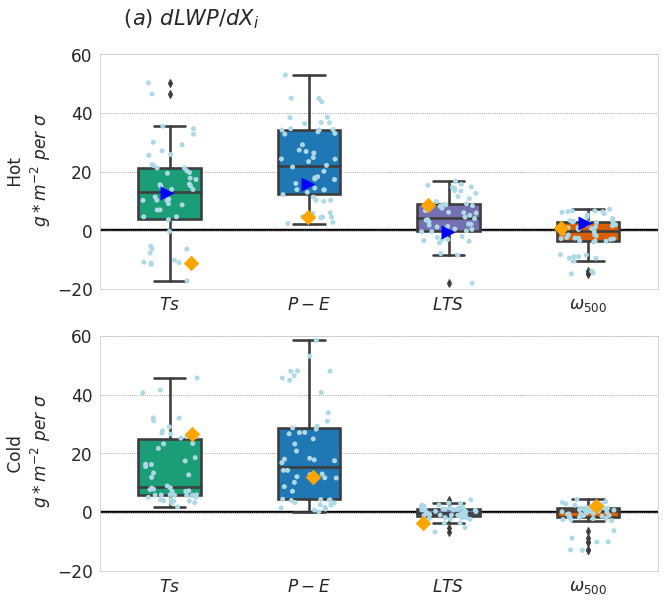

In [67]:
# Box plots:

# subplot (a):

fig7, ax7 = plt.subplots(2, 1, figsize = (10, 9.5))

parameters = {'axes.labelsize': 22, 'legend.fontsize': 12,
          'axes.titlesize': 14, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)
# specific model No.
# CESM2
model_i = 2

# Data Frame:
d1 = {'col1': arange(0, 50*4), 'value': stcoef_r2.ravel(), 'CCFs': array([r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'] * 50)}
data1  = pd.DataFrame(data=d1, index=arange(0, 50 * 4))  # Hot
d_specGCM1 = {'col1': arange(0, 4), 'value': stcoef_r2[model_i,:].ravel(), 'CCFs': array([r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'])}
d_specOBS1  = {'col1': arange(0, 4), 'value': a.ravel(), 'CCFs': array([r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'])}

d2 = {'col1': arange(0, 50*4), 'value': stcoef_r1.ravel(), 'CCFs': array([r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'] * 50)}
data2  = pd.DataFrame(data=d2, index=arange(0, 50 * 4))
d_specGCM2 = {'col1': arange(0, 4), 'value': stcoef_r1[model_i,:].ravel(), 'CCFs': array([r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'])}

# Coefficient plot

bplot1 = sns.boxplot(ax=ax7[0], x = "CCFs", y = "value", data = d1, width = 0.45, linewidth = 2.6, whis = 1.3)
stplot1 = sns.stripplot(ax=ax7[0], x = "CCFs", y = "value", data = d1, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM1 = sns.stripplot(ax=ax7[0], x = "CCFs", y = "value", data = d_specGCM1, color="orange", marker = 'D', jitter = 0.2, size = 11)
stplot_specOBS1 = sns.stripplot(ax=ax7[0], x = "CCFs", y = "value", data = d_specOBS1, color="blue", marker = '>', jitter = 0.023, size = 14)
# ax7[0].set_title(" Hot ", loc = 'center', fontsize = 18, pad = 12)
ax7[0].set_ylim([-20, 60])
bplot2 = sns.boxplot(ax=ax7[1], x = "CCFs", y = "value", data = d2, width = 0.45, linewidth = 2.6, whis = 1.3)
stplot2 = sns.stripplot(ax=ax7[1], x = "CCFs", y = "value", data = d2, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM2 = sns.stripplot(ax=ax7[1], x = "CCFs", y = "value", data = d_specGCM2, color="orange", marker = 'D', jitter=0.2, size = 11)
# ax7[1].set_title(" Cold ", loc = 'center', fontsize = 18, pad = 12)
ax7[1].set_ylim([-20, 60])

ax7[0].text(-0.38, 70., r"$\ (a)\ dLWP/dX_{i}$", fontsize = 21, horizontalalignment = 'left')

# Plot setting

ax7[0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax7[1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax7[0].set_ylabel(" Hot \n" + r"$\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
ax7[1].set_ylabel(" Cold \n" + r"$\ g*m^{-2}\ per\ \sigma $", fontsize = 17)

# seaborn setting:
CCFs2 = [r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$']
CCFs_colors2 = ["#1b9e77", "#1f78b4", "#7570b3", "#d95f02"]

color_dict2 = dict(zip(CCFs2, CCFs_colors2))

for i in range(0, 4):
    mybox1 = bplot1.artists[i]
    mybox1.set_facecolor(color_dict2[CCFs2[i]])

    mybox2 = bplot2.artists[i]
    mybox2.set_facecolor(color_dict2[CCFs2[i]])

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})

# plt.subplots_adjust(left=0.125, bottom = 0.105, right=0.9, top = 0.78, wspace = 0.14, hspace = 0.470)

# plt.savefig(path6+"Box_panel(a)_sensitivity.jpg", bbox_inches = 'tight', dpi = 250)

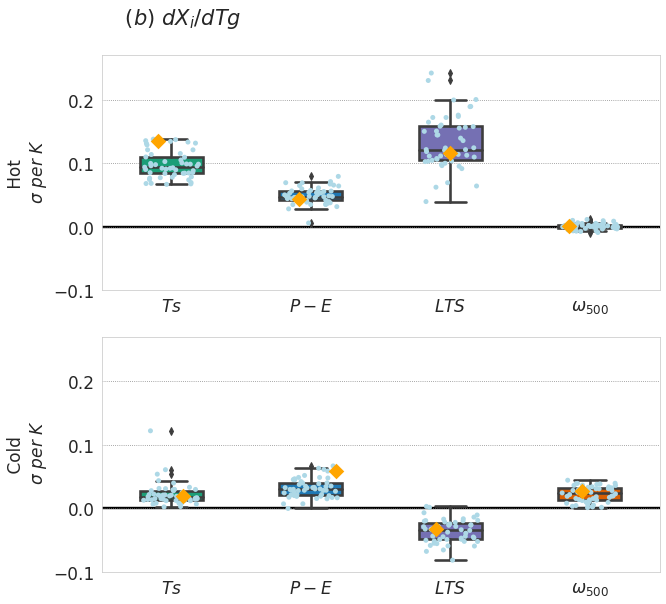

In [68]:
# Box plots:

# subplot (b):

fig72, ax72 = plt.subplots(2, 1, figsize = (10, 9.5))

parameters = {'axes.labelsize': 22, 'legend.fontsize': 12,
          'axes.titlesize': 14, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)
# specific model No.
# CESM2 (2); TaiESM1 (29)
model_i = 2

# Data Frame:
d3 = {'col1': arange(0, 50*4), 'value': dX_dTg_r2.ravel(), 'CCFs': array([r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'] * 50)}
data3 = pd.DataFrame(data=d3, index=arange(0, 50 * 4))  # Hot
d_specGCM3 = {'col1': arange(0, 4), 'value': dX_dTg_r2[model_i,:].ravel(), 'CCFs': array([r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'])}

d4 = {'col1': arange(0, 50*4), 'value': dX_dTg_r1.ravel(), 'CCFs': array([r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'] * 50)}
data4 = pd.DataFrame(data=d4, index=arange(0, 50 * 4))
d_specGCM4 = {'col1': arange(0, 4), 'value': dX_dTg_r1[model_i,:].ravel(), 'CCFs': array([r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'])}

# Temperature-mediated CCF Change:

bplot3 = sns.boxplot(ax=ax72[0], x = "CCFs", y = "value", data = d3, width = 0.45, linewidth = 2.6, whis = 1.3)
stplot3 = sns.stripplot(ax=ax72[0], x = "CCFs", y = "value", data = d3, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM3 = sns.stripplot(ax=ax72[0], x = "CCFs", y = "value", data = d_specGCM3, color="orange", marker = 'D', jitter = 0.2, size = 11)
# ax7[0].set_title(" Hot ", loc = 'center', fontsize = 18, pad = 12)
ax72[0].set_ylim([-0.10, 0.27])
bplot4 = sns.boxplot(ax=ax72[1], x = "CCFs", y = "value", data = d4, width = 0.45, linewidth = 2.6, whis = 1.3)
stplot4 = sns.stripplot(ax=ax72[1], x = "CCFs", y = "value", data = d4, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM4 = sns.stripplot(ax=ax72[1], x = "CCFs", y = "value", data = d_specGCM4, color="orange", marker = 'D', jitter=0.2, size = 11)
# ax72[1].set_title(" Cold ", loc = 'center', fontsize = 18, pad = 12)
ax72[1].set_ylim([-0.10, 0.27])

ax72[0].text(-0.38, 0.319, r"$\ (b)\ dX_{i}/dTg\ $", fontsize = 21, horizontalalignment = 'left')

# Plot setting
ax72[0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax72[0].set_ylabel(" Hot \n" + r"$\ \sigma\ per\ K $", fontsize = 17)
ax72[1].set_ylabel(" Cold \n" + r"$\ \sigma\ per\ K $", fontsize = 17)

# seaborn setting:
CCFs2 = [r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$']
CCFs_colors2 = ["#1b9e77", "#1f78b4", "#7570b3", "#d95f02"]

color_dict2 = dict(zip(CCFs2, CCFs_colors2))

for j in range(0, 4):
    mybox3 = bplot3.artists[j]
    mybox3.set_facecolor(color_dict2[CCFs2[j]])

    mybox4 = bplot4.artists[j]
    mybox4.set_facecolor(color_dict2[CCFs2[j]])

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})

# plt.subplots_adjust(left=0.125, bottom = 0.105, right=0.9, top = 0.78, wspace = 0.14, hspace = 0.470)
plt.savefig(path6+"Box_panel(b)_changes_of_CCF.jpg", bbox_inches = 'tight', dpi = 250)

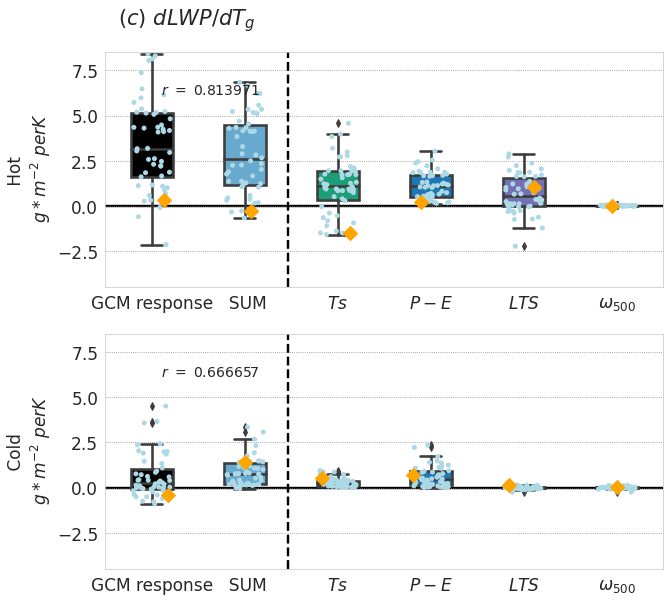

In [75]:
# Box plots:

# subplot (b):

fig73, ax73 = plt.subplots(2, 1, figsize = (10, 9.5))

parameters = {'axes.labelsize': 22, 'legend.fontsize': 12,
          'axes.titlesize': 14, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)
# specific model No.
# CESM2(2); TaiESM1(29)
model_i = 2

# Data Frame:
d5 = {'col1': arange(0, 50*6), 'value': CC_ccfdriven_withtruemodelr2.ravel(), 'CCFs': array([' ' * 8, ' ' * 4, r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'] * 50)}
data5 = pd.DataFrame(data=d5, index=arange(0, 50 * 6))  # Hot
d_specGCM5 = {'col1': arange(0, 6), 'value': CC_ccfdriven_withtruemodelr2[model_i,:].ravel(), 'CCFs': array(['GCM response', '  SUM ', r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'])}

d6 = {'col1': arange(0, 50*6), 'value': CC_ccfdriven_withtruemodelr1.ravel(), 'CCFs': array([' ' * 8, ' ' * 4, r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'] * 50)}
data6 = pd.DataFrame(data=d6, index=arange(0, 50 * 6))
d_specGCM6 = {'col1': arange(0, 6), 'value': CC_ccfdriven_withtruemodelr1[model_i,:].ravel(), 'CCFs': array(['GCM response', '  SUM ', r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$'])}

# Cloud-Controlling-factor's individual components and the SUM and the GCM true:

bplot5 = sns.boxplot(ax=ax73[0], x = "CCFs", y = "value", data = d5, width = 0.45, linewidth = 2.6, whis = 1.3)
stplot3 = sns.stripplot(ax=ax73[0], x = "CCFs", y = "value", data = d5, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM3 = sns.stripplot(ax=ax73[0], x = "CCFs", y = "value", data = d_specGCM5, color="orange", marker = 'D', jitter = 0.2, size = 11)
# ax7[0].set_title(" Hot ", loc = 'center', fontsize = 18, pad = 12)
R2_Totalccfsdriven_LWP = r2_score(CC_ccfdriven_withtruemodelr2[:, 0], CC_ccfdriven_withtruemodelr2[:, 1])
r_Totalccfsdriven_LWP, p_value = pearsonr(CC_ccfdriven_withtruemodelr2[:, 1], CC_ccfdriven_withtruemodelr2[:, 0]) 
ax73[0].annotate(r"$r\ =\ %4f$" % r_Totalccfsdriven_LWP, xy=(0.45, 2.16), textcoords = 'axes fraction', xytext=(0.10, 0.82), fontsize = 14)

ax73[0].set_ylim([-4.5, 8.5])

bplot6 = sns.boxplot(ax=ax73[1], x = "CCFs", y = "value", data = d6, width = 0.45, linewidth = 2.6, whis = 1.3)
stplot6 = sns.stripplot(ax=ax73[1], x = "CCFs", y = "value", data = d6, color="lightblue", jitter=0.2, size = 5)
stplot_specGCM6 = sns.stripplot(ax=ax73[1], x = "CCFs", y = "value", data = d_specGCM6, color="orange", marker = 'D', jitter=0.2, size = 11)
# ax72[1].set_title(" Cold ", loc = 'center', fontsize = 18, pad = 12)
R2_Totalccfsdriven_LWP = r2_score(CC_ccfdriven_withtruemodelr1[:, 0], CC_ccfdriven_withtruemodelr1[:, 1])
r_Totalccfsdriven_LWP, p_value = pearsonr(CC_ccfdriven_withtruemodelr1[:, 1], CC_ccfdriven_withtruemodelr1[:, 0]) 
ax73[1].annotate(r"$r\ =\ %4f$" % r_Totalccfsdriven_LWP, xy=(0.45, 3.24), textcoords = 'axes fraction', xytext=(0.10, 0.82), fontsize = 14)
ax73[1].set_ylim([-4.5, 8.5])

ax73[1].text(-0.36, 25.642, r"$ (c)\ dLWP/dT_{g}\ $", fontsize = 21, horizontalalignment = 'left')

# Plot setting
ax73[0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax73[1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)

ax73[0].axvline(1.46, c = 'k', linestyle = '--', linewidth = 2.4)
ax73[1].axvline(1.46, c = 'k', linestyle = '--', linewidth = 2.4)
ax73[0].set_ylabel(" Hot \n" + r"$\ g*m^{-2}\ per K $ ", fontsize = 17)
ax73[1].set_ylabel(" Cold \n" + r"$\ g*m^{-2}\ per K $ ", fontsize = 17)

# seaborn setting:
CCFs = ['GCM response', 'SUM', r'$Ts$', r'$P - E$', r'$LTS$', r'$omega_{500}$']
CCFs_colors = ["black", "#67a9cf", "#1b9e77", "#1f78b4", "#7570b3", "#d95f02"]

CCFs2 = [r'$Ts$', r'$P - E$', r'$LTS$', r'$\omega_{500}$']
CCFs_colors2 = ["#1b9e77", "#1f78b4", "#7570b3", "#d95f02"]

color_dict =  dict(zip(CCFs, CCFs_colors))
color_dict2 = dict(zip(CCFs2, CCFs_colors2))

for j in range(0, 6):
    mybox5 = bplot5.artists[j]
    mybox5.set_facecolor(color_dict[CCFs[j]])

    mybox6 = bplot6.artists[j]
    mybox6.set_facecolor(color_dict[CCFs[j]])

sns.set_style("whitegrid", {"grid.color": "gray", "grid.linestyle": ":"})

# plt.subplots_adjust(left=0.125, bottom = 0.105, right=0.9, top = 0.78, wspace = 0.14, hspace = 0.470)
# plt.savefig(path6+"Box_panel(c)_CCFs_driven_LWPchanges.jpg", bbox_inches = 'tight', dpi = 250)

# Observation Constraints

In [76]:
from scipy.optimize import curve_fit

def target_func(x, m, k):
    
    '''
    1-d line linear fit
    '''
    y = m * x + k
    return y


def calc_r2(Y_pre, Y):

    residual_ydata = array(Y).reshape(-1,1) - array(Y_pre).reshape(-1,1)
    
    ss_res_bar  = (residual_ydata**2).sum()
    ss_tot_bar  = ((Y - Y.mean())**2).sum()
    R_square = 1. - (ss_res_bar/ss_tot_bar)

    return R_square

0.928365709436396
2.300362775812734
3.7406659127350474
[0, 1, 5, 6, 8, 14, 20, 22, 23, 35, 37, 41]


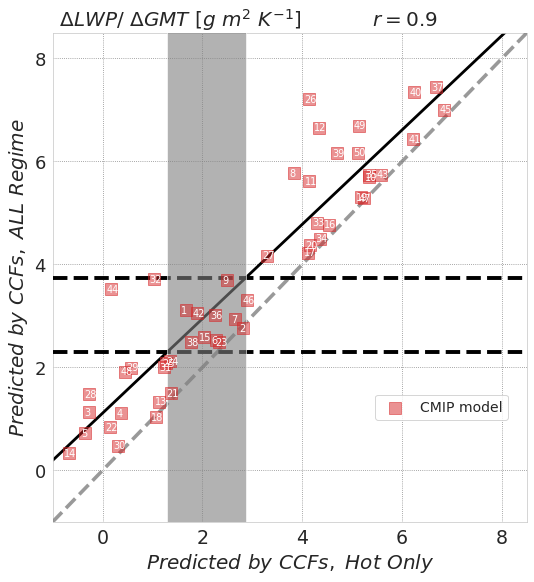

In [77]:
import matplotlib.pyplot as plt
# plot settings:
parameters = {'axes.labelsize': 20, 'legend.fontsize': 14, 
       'axes.titlesize': 23, 'xtick.labelsize': 19, 'ytick.labelsize': 18}
plt.rcParams.update(parameters)

fig2, axes2 = plt.subplots(1, 1, figsize = (8.5, 9.0))

n_name = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
          31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]

x = linspace(-1, 8.5, 50)
y = x

plot_scat1 = []
plot_scat2 = []

x1 = np.min(delta_LWP_dTg_OBS_warm)
x2 = np.max(delta_LWP_dTg_OBS_warm)

for a in range(len(deck_nas2)):
    scp1 = plt.scatter(delta_LWP_dTg_LRM_hot[a], delta_LWP_dTg_LRM_all[a], s = 134, marker = 's', color="tab:red", alpha = 0.50, zorder = 12)
    
    plot_scat1.append(scp1)
    # scp2 = plt.scatter(delta_LWP_dTg_OBS_warm[a], delta_LWP_dTg_LRM_all[a], s = 132, marker = 's', color="tab:green", alpha = 0.50, zorder = 10)
    # plot_scat2.append(scp2)
    
    # Add annotate to the first point of each GCM
    axes2.annotate(n_name[a], xy=(delta_LWP_dTg_LRM_hot[a], delta_LWP_dTg_LRM_all[a]),
            xytext=(-4.60, -3.42), textcoords = "offset points", color = 'white', fontsize = 9.8, zorder = 98)
             #  horizontalalignment= "left" if output_meandelta_dLWPdGMT[deck_nas2[a]+'_predict_150yrs_0K'] > output_meandelta_dLWPdGMT[deck_nas2[a]+'_actual_150yrs_0K'] else "right", verticalalignment = "bottom")
    
#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_2, POCV_2 = curve_fit(target_func, delta_LWP_dTg_LRM_hot, delta_LWP_dTg_LRM_all)
# Calc the R square, plot the fit line:
pearsonr_2 = pearsonr(delta_LWP_dTg_LRM_hot, delta_LWP_dTg_LRM_all)[0]
R_square_2 = calc_r2(delta_LWP_dTg_LRM_hot, delta_LWP_dTg_LRM_all)
fitp3 = axes2.plot(y, POPT_2[0] * x + POPT_2[1], linestyle = '-', color = 'black', linewidth = 2.8)
print(pearsonr_2)

# Add Reference line:
Refp = axes2.plot(x, y, label = "1-1 reference line", c = 'gray', linestyle= '--', alpha = 0.8, linewidth = 3.6, zorder = 5)  # Blue

# Add Reference line 2, 3
Refp2 = axes2.plot(x, [POPT_2[0] * x1 + POPT_2[1]] * 50, c = 'k', linestyle = '--', linewidth = 3.9, zorder = 8)
y1_all_OBS_range = POPT_2[0] * x1 + POPT_2[1] 
print(y1_all_OBS_range)
Refp3 = axes2.plot(x, [POPT_2[0] * x2 + POPT_2[1]] * 50, c = 'k', linestyle = '--', linewidth = 3.9, zorder = 7)
y2_all_OBS_range = POPT_2[0] * x2 + POPT_2[1]
print(y2_all_OBS_range)

axes2.set_xlim([-1.0, 8.5])
axes2.set_ylim([-1.0, 8.5])
# axes2.set_xticks(np.arange(0., 9., 9), np.arange(0, 9, 9))
# axes2.set_yticks(np.arange(0., 9., 9), np.arange(0, 9, 9))
axes2.set_xlabel(r"$ Predicted\ by\ CCFs,\ Hot\ Only\ $") # r"$ Mean\ \Delta LWP\ Predicted\ by\ CCFs,\ $" + r"$g\ m^{-2}$"
axes2.set_ylabel(r"$ Predicted\ by\ CCFs,\ ALL\ Regime\ $") # Mean\ \Delta LWP\ Predicted\ by\ GCMs,\ $" + r"$g\ m^{-2}$"

axes2.set_title( r"$\ \Delta LWP/\ \Delta GMT\ [g\ m^{2}\ K^{-1}]\ \ \ \ \ \ \ \ \ \ \ r = 0.9$", loc ='left', fontsize = 20) # r"$%d\ yrs\ mean\ \frac{\Delta LWP}{\Delta GMT}\ in\ 'abrupt-4xCO2'$"%(yr1)
legend61 = axes2.legend([scp1], ['CMIP model'], 
                    loc='lower right', bbox_to_anchor=(0.975, 0.194), fontsize = 14)  # scp2 'OBS Constraint for Hot regime '

plt.axvspan(x1, x2, np.min(y), np.max(y), facecolor = 'gray', alpha = 0.6, zorder = 9)
# axes2.legend()
# axes2.add_artist(legend61)

sns.set_style("whitegrid", {"grid.linestyle": "--"})
# plt.savefig(path6+'Predict_hot_Predict_all_withconstrainedby_OBS_Hot.jpg', bbox_inches = 'tight', dpi = 400)

# determine the OBS range of 'Warm' Regime constraint,
OBS_range_model = []
for a in range(len(deck_nas2)):
    
    if (delta_LWP_dTg_LRM_hot[a] > x1) & (delta_LWP_dTg_LRM_hot[a] < x2):
        
        OBS_range_model.append(int(a))

print(OBS_range_model)

0.8667950966242843
2.7062554003906234
4.037867652984007
[0, 1, 5, 6, 8, 14, 20, 22, 23, 35, 37, 41]
[0, 1, 5, 6, 8, 14, 22, 31, 35, 37, 41, 43, 45]
[0, 1, 5, 6, 8, 14, 22, 35, 37, 41]


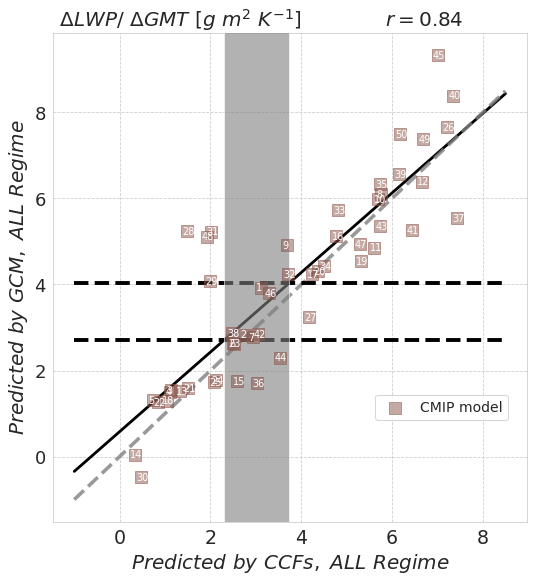

In [82]:
import matplotlib.pyplot as plt
# plot settings:
parameters = {'axes.labelsize': 20, 'legend.fontsize': 14, 
       'axes.titlesize': 23, 'xtick.labelsize': 19, 'ytick.labelsize': 18}
plt.rcParams.update(parameters)

fig, axes = plt.subplots(1, 1, figsize = (8.5, 9.0))

n_name = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
          31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]

x = linspace(-1, 8.5, 50)
y = x

plot_scat1 = []
plot_scat2 = []

x1 = y1_all_OBS_range
x2 = y2_all_OBS_range

for a in range(len(deck_nas2)):
    scp1 = plt.scatter(delta_LWP_dTg_LRM_all[a], delta_LWP_dTg_GCM[a], s = 132, marker = 's', color="tab:brown", alpha = 0.50, zorder = 12)
    
    plot_scat1.append(scp1)
    # scp2 = plt.scatter(delta_LWP_dTg_OBS_warm[a], delta_LWP_dTg_LRM_all[a], s = 132, marker = 's', color="tab:green", alpha = 0.50, zorder = 10)
    # plot_scat2.append(scp2)
    
    # Add annotate to the first point of each GCM
    axes.annotate(n_name[a], xy=(delta_LWP_dTg_LRM_all[a], delta_LWP_dTg_GCM[a]),
            xytext=(-4.60, -3.42), textcoords = "offset points", color = 'white', fontsize = 9.8, zorder = 98)
             #  horizontalalignment= "left" if output_meandelta_dLWPdGMT[deck_nas2[a]+'_predict_150yrs_0K'] > output_meandelta_dLWPdGMT[deck_nas2[a]+'_actual_150yrs_0K'] else "right", verticalalignment = "bottom")
    
#.. linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_2, POCV_2 = curve_fit(target_func, delta_LWP_dTg_LRM_all, delta_LWP_dTg_GCM)
# Calc the R square, plot the fit line:
pearsonr_2 = pearsonr(delta_LWP_dTg_LRM_all, delta_LWP_dTg_GCM)[0]
R_square_2 = calc_r2(delta_LWP_dTg_LRM_all, delta_LWP_dTg_GCM)
fitp3 = axes.plot(y, POPT_2[0] * x + POPT_2[1], linestyle = '-', color = 'black', linewidth = 2.8)
print(pearsonr_2)

# Add Reference line:
Refp = axes.plot(x, y, label = "1-1 reference line", c = 'gray', linestyle= '--', alpha = 0.8, linewidth = 3.6, zorder = 5)  # Blue

# Add Reference line 2, 3
Refp2 = axes.plot(x, [POPT_2[0] * x1 + POPT_2[1]] * 50, c = 'k', linestyle = '--', linewidth = 3.9, zorder = 8)
y1_all_OBS_range2 = POPT_2[0] * x1 + POPT_2[1] 
print(y1_all_OBS_range2)
Refp3 = axes.plot(x, [POPT_2[0] * x2 + POPT_2[1]] * 50, c = 'k', linestyle = '--', linewidth = 3.9, zorder = 7)
y2_all_OBS_range2 = POPT_2[0] * x2 + POPT_2[1]
print(y2_all_OBS_range2)

axes2.set_xlim([-1.0, 8.5])
axes2.set_ylim([-1.0, 8.5])
# axes2.set_xticks(np.arange(0., 9., 9), np.arange(0, 9, 9))
# axes2.set_yticks(np.arange(0., 9., 9), np.arange(0, 9, 9))
axes.set_xlabel(r"$ Predicted\ by\ CCFs,\ ALL\ Regime\ $") # r"$ Mean\ \Delta LWP\ Predicted\ by\ CCFs,\ $" + r"$g\ m^{-2}$"
axes.set_ylabel(r"$ Predicted\ by\ GCM,\ ALL\ Regime\ $") # Mean\ \Delta LWP\ Predicted\ by\ GCMs,\ $" + r"$g\ m^{-2}$"

axes.set_title( r"$\ \Delta LWP/\ \Delta GMT\ [g\ m^{2}\ K^{-1}]\ \ \ \ \ \ \ \ \ \ \ \ \ r = 0.84$", loc ='left', fontsize = 20) # r"$%d\ yrs\ mean\ \frac{\Delta LWP}{\Delta GMT}\ in\ 'abrupt-4xCO2'$"%(yr1)
legend61 = axes.legend([scp1], ['CMIP model'], 
                    loc='lower right', bbox_to_anchor=(0.975, 0.194), fontsize = 14)  # scp2 'OBS Constraint for Hot regime '

plt.axvspan(x1, x2, np.min(y), np.max(y), facecolor = 'gray', alpha = 0.6, zorder = 9)
# axes2.legend()
# axes2.add_artist(legend61)

sns.set_style("whitegrid", {"grid.linestyle": "--"})
# plt.savefig(path6+'Predict_all_GCM_all_withconstrainedby_OBS_All.jpg', bbox_inches = 'tight', dpi = 400)



# determine the OBS range of 'Warm' Regime constraint,
OBS_range_model2 = []
for b in range(len(deck_nas2)):
    
    if (delta_LWP_dTg_LRM_all[b] > x1) & (delta_LWP_dTg_LRM_all[b] < x2):
        
        OBS_range_model2.append(int(b))

print(OBS_range_model)

print(OBS_range_model2)

OBS_range_MODEL_common = []
for i in range(len(OBS_range_model2)):
    
    if OBS_range_model2[i] in OBS_range_model:
        
        OBS_range_MODEL_common.append(OBS_range_model2[i])
    
print(OBS_range_MODEL_common)

2003.0
[2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.
 2015. 2016.]
(0.8594332254275012, 3.532872689814453e-36)


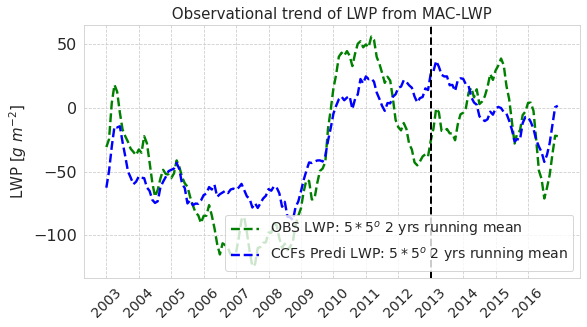

In [34]:
# OBS predi plot:

# monthly, binned

# LWP_obs_trends(predict_result_1r['LWP_actual_predict'], predict_result_1r['LWP_predi_predict'], predict_result_1r['LWP_actual_training'], predict_result_1r['LWP_predi_training'], times_Array_predict, times_Array_training, y_range, x_range, data_type = '3', running_mean_window = 2)

print(pearsonr(area_mean(predict_result_1r['LWP_actual_predict']* std_dev_LWP, y_range, x_range), area_mean(predict_result_1r['LWP_predi_predict']* std_dev_LWP, y_range, x_range)))

In [31]:
print(area_mean(get_annually_metric(dict_training['LWP'], dict_training['LWP'].shape[0], dict_training['LWP'].shape[1], dict_training['LWP'].shape[2]), y_range, x_range))

[0.09042185 0.09200639 0.09213382 0.09092092]


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/useful_func_cy.py:122: RuntimeWarning: Mean of empty slice
  layover_yr[i, :, :] = nanmean(data[i*12:(i+1)*12,:,:], axis=0)


In [33]:
print(area_mean(get_annually_metric(dict_training['LWP'], dict_training['LWP'].shape[0], dict_training['LWP'].shape[1], dict_training['LWP'].shape[2]), y_range, x_range))

[0.09042185 0.09200639 0.09213382 0.09092092]
